In [1]:
#Import Tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#### read the dataset
data = pd.read_csv('kc_house_data.csv')

#### cleaning the dataset
data = data.drop(["waterfront","view","sqft_above","sqft_basement","yr_renovated","lat","long","sqft_living15","sqft_lot15"], axis = 1)

#### rename the columns
data.columns = ['id','date','price','bedrooms','bathrooms','livsqft','lotsqft',
              'floors','condition','grade','builtyr','zipcode']

#### Remove the rows which have missing data
data.dropna()

#### Add new columns
data['price_pre_lotsqft']=data['price']/data['lotsqft']

#### view first five rows of the dataset
data.head()

,id,date,price,bedrooms,bathrooms,livsqft,lotsqft,floors,condition,grade,builtyr,zipcode,price_pre_lotsqft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178,39.274336
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,74.288870
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028,18.000000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,120.800000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,63.118812


In [28]:
#### get distributions of each variable
data.describe()

,id,price,bedrooms,bathrooms,livsqft,lotsqft,floors,condition,grade,builtyr,zipcode,price_pre_lotsqft
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1971.005136,98077.939805,88.966710
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,29.373411,53.505026,94.055247
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,98001.000000,0.163119
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,98033.000000,33.333333
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,98065.000000,59.223301
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,1997.000000,98118.000000,107.594937
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,98199.000000,2027.208539


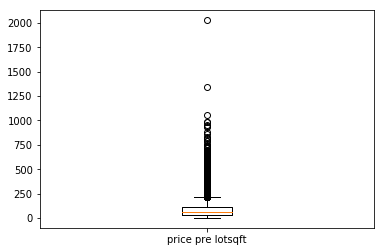

In [10]:
#### This function is used to present the boxplot for the price of per sqft lot.
def boxplot(data):
    plt.boxplot(data['price_pre_lotsqft'], labels = ['price pre lotsqft'])  
    plt.show()
    
boxplot(data)

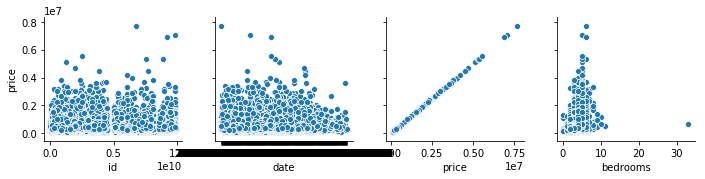

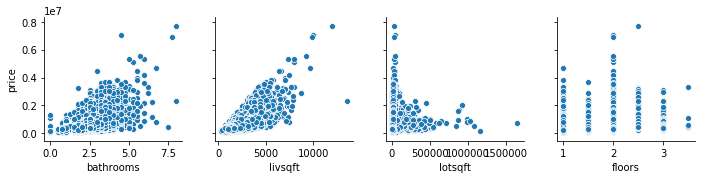

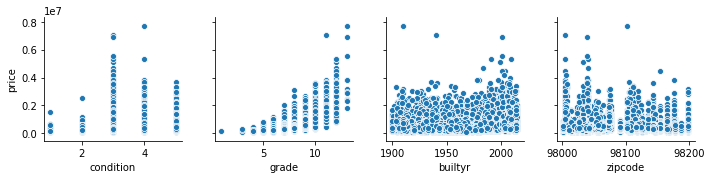

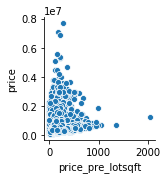

In [6]:
#### This function is used to show the relationship between 'Price' and others variables    
def relation_variables(data):
    for i in range(0, len(data.columns), 4):
        sns.pairplot(data=data,
                    x_vars=data.columns[i:i+4],
                    y_vars=['price'])
        
relation_variables(data)


In [16]:
#### This function is used to make a mutiple regression model for further predict. 
def linear_regression(data):    
    from sklearn import linear_model
    X = data[['livsqft','floors','builtyr', 'lotsqft','grade' ]]
    Y = data['price']
    data_regre = linear_model.LinearRegression()
    data_regre.fit(X, Y)
    print('Intercept:', data_regre.intercept_)
    print('Coefficients:', data_regre.coef_)

    
linear_regression(data)

Intercept: 6657214.201482513
Coefficients: [ 1.79289939e+02  3.05217878e+04 -3.85444086e+03 -1.93444138e-01
  1.39013006e+05]


In [34]:
#### Analysis 
print('The average of the per sqft price are $88')
print('Based on the second plot I created, I found that the prise has a trend between the variables of livsqft, floors, builtyr, lotsqft, and grade')
print('the result of the regression model is: price= 6657214.201482513 + 1.79289939e+02*livsqft + 3.05217878e+04*floors + (-3.85444086e+03)*builtyr + (-1.93444138e-01)*lotsqft + 1.39013006e+05*grade')



The average of the per sqft price are $88
Based on the second plot I created, I found that the prise has a trend between the variables of livsqft, floors, builtyr, lotsqft, and grade
the result of the regression model is: price= 6657214.201482513 + 1.79289939e+02*livsqft + 3.05217878e+04*floors + (-3.85444086e+03)*builtyr + (-1.93444138e-01)*lotsqft + 1.39013006e+05*grade
